# IAU-PROJEKT, STAHOVEC a VIEST
------------------------------------------------
Projekt začína základnými importmi pre knižnice, ktoré budeme v projekte používať

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

Hneď na začiatok si **načítame dáta** zo súboru funkciou **read_csv()**
Následne vykonáme prvú "čistiacu" operáciu, v ktorej vymažeme prvý stĺpec, v ktorom
je očíslovanie stĺpcov, ktoré je pre našu analýzu zbytočné.

In [110]:
data_labor = pd.read_csv("dataset/labor.csv", sep="\t")
# del data["Unnamed: 0"]
data_labor = data_labor.iloc[:, 1:]
data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Y,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,no,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,Y,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,Y,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


V tejto časti očistíme dáta v stĺpci **smoker**, kde všetky nejednotné záznamy
nahradíme numerickými reprezentáciámi možností áno/nie.

In [111]:
data_labor["smoker"] = data_labor["smoker"].str.replace("yes", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("no", "0")
data_labor["smoker"] = data_labor["smoker"].str.replace("Y", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("N", "0")
data_labor["smoker"] = data_labor["smoker"].astype(float)

data_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9971 non-null   float64
 1   hbver         9940 non-null   float64
 2   erytrocyty    9939 non-null   float64
 3   alt           9941 non-null   float64
 4   leukocyty     9941 non-null   float64
 5   etytr         9940 non-null   float64
 6   hemoglobin    9940 non-null   float64
 7   ssn           9971 non-null   object 
 8   name          9971 non-null   object 
 9   trombocyty    9941 non-null   float64
 10  alp           9941 non-null   float64
 11  relationship  9971 non-null   object 
 12  indicator     9971 non-null   float64
 13  er-cv         9941 non-null   float64
 14  weight        9971 non-null   float64
 15  ast           9941 non-null   float64
 16  hematokrit    9941 non-null   float64
dtypes: float64(14), object(3)
memory usage: 1.3+ MB


V nasledujúcej bunke sme **nahradili chýbajúce hodnoty** priemerom v danom stĺpci.
Túto operáciu sme mohli vykonať z dôvodu, že všetky **chýbajúce hodnoty** boli iba v tých
stĺpcoch, ktoré obsahujú **numerické hodnoty** (float64).

In [112]:
data_labor = data_labor.fillna(data_labor.mean())
data_labor

/tmp/ipykernel_66644/1159283875.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_labor = data_labor.fillna(data_labor.mean())


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,1.0,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,0.0,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,1.0,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,1.0,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


In [113]:
data_labor.describe()

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,0.406278,6.071692,6.842049,1.120983,6.064355,5.318564,6.062952,6.084395,54.622262,0.643165,51.121580,70.305658,50.459989,6.461410
std,0.491162,1.000834,1.460087,2.019724,1.009118,1.393256,1.741981,1.006202,26.103211,0.479090,12.856008,34.976941,12.771838,1.617865
min,0.000000,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,-54.061950,0.000000,1.991860
25%,0.000000,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,0.000000,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,1.000000,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,1.000000,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


# 1. fáza - Prieskumná analýza

## a) Základný opis dát spolu s ich charakteristikami
-------------------------------------------------------
Základné informácie o datasete:

In [114]:
print(f"Počet záznamov v našom datasete: {len(data_labor.index)}")
print(f"Počet atribútov v našom datasete: {len(data_labor.columns)}")
# print(f"Dátové typy v našom datasete:\n {data_labor.dtypes}")
print(f"Dátové typy v našom datasete: {list(set(data_labor.dtypes))}")

Počet záznamov v našom datasete: 9971
Počet atribútov v našom datasete: 17
Dátové typy v našom datasete: [dtype('O'), dtype('float64')]


V tejto časti uvedieme pre zvolené **významné atribúty ich distribúcie a základné
deskriptívne štatistiky.**
Medzi tieto významné atribúty patria **erytrocyty, leukocyty, trombocyty a váha**.
Pre ich deskriptívne štatistiky uvádzame **medián, modus, priemer, rozptyl a smerodajnú odchylku.**
<br>

Hodnota modusu je väčšinou **rovná priemeru**, keďže nahradzujeme chýbajúce hodnoty priemerom. Je
potrebné brať tieto hodnoty s rezervou, keďže dáta ešte neboli očistené a mnoho záznamov spadá
do surreálnych hodnôt (napr. záporne záznamy pre atribút váhy).
</br>

###  Erytrocyty

[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


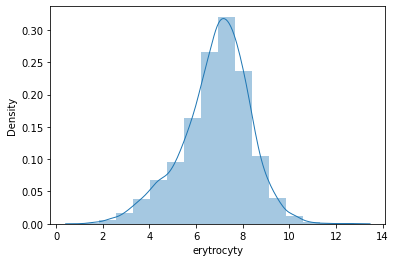

In [115]:
sns.distplot(data_labor["erytrocyty"], kde=True, kde_kws={"lw": 1}, bins=16)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

### Leukocyty

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[leukocyty] Medián:   6.07108
[leukocyty] Modus:    6.064355209737452
[leukocyty] Priemer:  6.0643552097374505
[leukocyty] Rozptyl:  1.0182179280312194
[leukocyty] Smerodajná odchylka:  1.0090678510542388


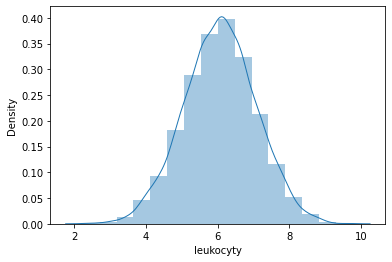

In [116]:
sns.distplot(data_labor["leukocyty"], kde=True, kde_kws={"lw": 1}, bins=16)
# sns.histplot(data=data_labor, x="leukocyty", bins=24, kde=True)
print(f"[leukocyty] Medián:  ", data_labor["leukocyty"].median())
print(f"[leukocyty] Modus:   ", data_labor.mode()["leukocyty"][0])
print(f"[leukocyty] Priemer: ", data_labor["leukocyty"].mean())
print(f"[leukocyty] Rozptyl: ", np.var(data_labor["leukocyty"]))
print(f"[leukocyty] Smerodajná odchylka: ", np.std(data_labor["leukocyty"]))


### Trombocyty

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[trombocyty] Medián:   6.084394732924253
[trombocyty] Modus:    6.084394732924253
[trombocyty] Priemer:  6.084394732924253
[trombocyty] Rozptyl:  1.0123415736654913
[trombocyty] Smerodajná odchylka:  1.0061518641166904


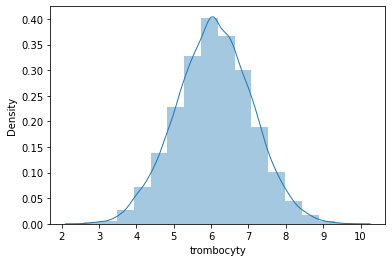

In [117]:
sns.distplot(data_labor["trombocyty"], kde=True, kde_kws={"lw": 1}, bins=16)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[trombocyty] Medián:  ", data_labor["trombocyty"].median())
print(f"[trombocyty] Modus:   ", data_labor.mode()["trombocyty"][0])
print(f"[trombocyty] Priemer: ", data_labor["trombocyty"].mean())
print(f"[trombocyty] Rozptyl: ", np.var(data_labor["trombocyty"]))
print(f"[trombocyty] Smerodajná odchylka: ", np.std(data_labor["trombocyty"]))

### Váha

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[weight] Medián:   70.7939
[weight] Modus:    -13.06891
[weight] Priemer:  70.30565801624712
[weight] Rozptyl:  1223.2637015794558
[weight] Smerodajná odchylka:  34.9751869413082


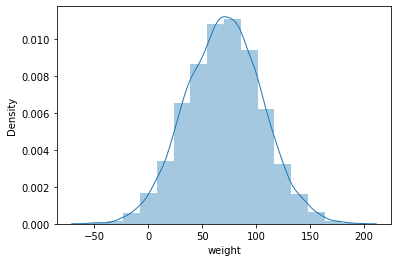

In [118]:
sns.distplot(data_labor["weight"], kde=True, kde_kws={"lw": 1}, bins=16)
# sns.histplot(data=data_labor, x="weight", bins=24, kde=True)
print(f"[weight] Medián:  ", data_labor["weight"].median())
print(f"[weight] Modus:   ", data_labor.mode()["weight"][0])
print(f"[weight] Priemer: ", data_labor["weight"].mean())
print(f"[weight] Rozptyl: ", np.var(data_labor["weight"]))
print(f"[weight] Smerodajná odchylka: ", np.std(data_labor["weight"]))


## b) Párová analýza dát
-------------------------------------------------------

In [121]:
data_labor.head()

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
